In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
header_names = ['Age','Gender','Chest pain type','Resting blood pressure','Serum cholesterol','Fasting blood sugar',
                'Resting electrocardiographic','Maximum heart rate','Excercise induced angina','ST depression','ST segment',
                'number of major vessels','Thal','class']

dataframe = pd.read_csv('heart-disease.data', names = header_names, )

print(dataframe.info())
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
Age                             920 non-null float64
Gender                          920 non-null float64
Chest pain type                 920 non-null float64
Resting blood pressure          920 non-null object
Serum cholesterol               920 non-null object
Fasting blood sugar             920 non-null object
Resting electrocardiographic    920 non-null object
Maximum heart rate              920 non-null object
Excercise induced angina        920 non-null object
ST depression                   920 non-null object
ST segment                      920 non-null object
number of major vessels         920 non-null object
Thal                            920 non-null object
class                           920 non-null int64
dtypes: float64(3), int64(1), object(10)
memory usage: 100.8+ KB
None


,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Excercise induced angina,ST depression,ST segment,number of major vessels,Thal,class
0,63.0,1.0,4.0,140,260,0,1,112,1,3,2,?,?,2
1,44.0,1.0,4.0,130,209,0,1,127,0,0,?,?,?,0
2,60.0,1.0,4.0,132,218,0,1,140,1,1.5,3,?,?,2
3,55.0,1.0,4.0,142,228,0,1,149,1,2.5,1,?,?,1
4,66.0,1.0,3.0,110,213,1,2,99,1,1.3,2,?,?,0


In [3]:
dataframe_nan = dataframe.replace(['?'], np.nan)

print(dataframe_nan.isna().sum())
dataframe_nan.head()

Age                               0
Gender                            0
Chest pain type                   0
Resting blood pressure           59
Serum cholesterol                30
Fasting blood sugar              90
Resting electrocardiographic      2
Maximum heart rate               55
Excercise induced angina         55
ST depression                    62
ST segment                      309
number of major vessels         611
Thal                            486
class                             0
dtype: int64


,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Excercise induced angina,ST depression,ST segment,number of major vessels,Thal,class
0,63.0,1.0,4.0,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44.0,1.0,4.0,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60.0,1.0,4.0,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55.0,1.0,4.0,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66.0,1.0,3.0,110,213,1,2,99,1,1.3,2,NaN,NaN,0


In [4]:
int_features = ['Age','Gender','Chest pain type','Resting blood pressure','Serum cholesterol','Fasting blood sugar',
                'Resting electrocardiographic','Maximum heart rate','Excercise induced angina','ST segment',
                'number of major vessels','Thal','class']
float_features = ['ST depression']

dataframe_nan[float_features + int_features] = dataframe_nan[float_features + int_features].apply(pd.to_numeric, downcast='float')

for feature_name in int_features:
    dataframe_nan[feature_name] = pd.array(dataframe_nan[feature_name].values,dtype=pd.Int64Dtype())

print(dataframe_nan.info())
print(dataframe_nan.describe())
dataframe_nan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
Age                             920 non-null Int64
Gender                          920 non-null Int64
Chest pain type                 920 non-null Int64
Resting blood pressure          861 non-null Int64
Serum cholesterol               890 non-null Int64
Fasting blood sugar             830 non-null Int64
Resting electrocardiographic    918 non-null Int64
Maximum heart rate              865 non-null Int64
Excercise induced angina        865 non-null Int64
ST depression                   858 non-null float32
ST segment                      611 non-null Int64
number of major vessels         309 non-null Int64
Thal                            434 non-null Int64
class                           920 non-null Int64
dtypes: Int64(13), float32(1)
memory usage: 108.8 KB
None
              Age      Gender  Chest pain type  Resting blood pressure  \
count  920.000000  920.000000       920.000000 

,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Excercise induced angina,ST depression,ST segment,number of major vessels,Thal,class
0,63,1,4,140,260,0,1,112,1,3.0,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0.0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0


In [5]:
new_df = dataframe_nan[float_features + int_features].apply(pd.to_numeric, downcast='float', errors='coerce')
new_df = new_df.fillna(new_df.median())
new_df.head()

,ST depression,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Excercise induced angina,ST segment,number of major vessels,Thal,class
0,3.0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,2.0,0.0,6.0,2.0
1,0.0,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,2.0,0.0,6.0,0.0
2,1.5,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,3.0,0.0,6.0,2.0
3,2.5,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,1.0,0.0,6.0,1.0
4,1.3,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,2.0,0.0,6.0,0.0


In [7]:
def label_genders(x):
    if x == 0:
        return "Female"
    else:
        return "Male"
    
new_df["Patient Gender"] = new_df["Gender"].apply(label_genders)

new_df

,ST depression,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Excercise induced angina,ST segment,number of major vessels,Thal,class,Patient Gender
0,3.0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,2.0,0.0,6.0,2.0,Male
1,0.0,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,2.0,0.0,6.0,0.0,Male
2,1.5,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,3.0,0.0,6.0,2.0,Male
3,2.5,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,1.0,0.0,6.0,1.0,Male
4,1.3,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,2.0,0.0,6.0,0.0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.0,70.0,1.0,4.0,115.0,0.0,0.0,1.0,92.0,1.0,2.0,0.0,7.0,1.0,Male
916,2.0,70.0,1.0,4.0,140.0,0.0,1.0,0.0,157.0,1.0,2.0,0.0,7.0,3.0,Male
917,1.6,72.0,1.0,3.0,160.0,0.0,0.0,2.0,114.0,0.0,2.0,2.0,6.0,0.0,Male
918,0.0,73.0,0.0,3.0,160.0,0.0,0.0,1.0,121.0,0.0,1.0,0.0,3.0,1.0,Female


Text(0.5, 0, 'Gender')

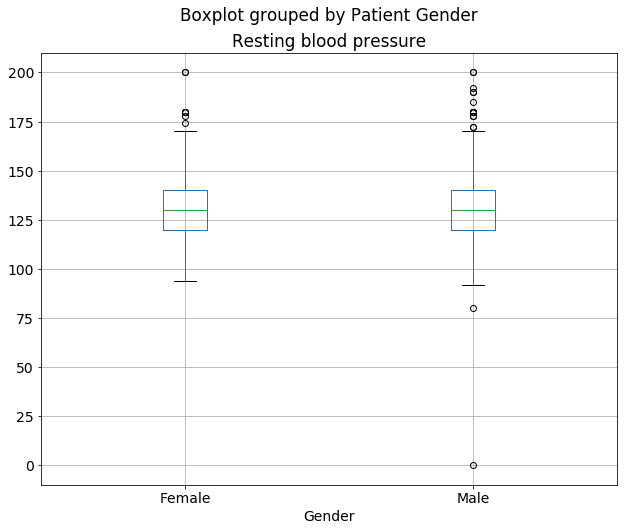

In [22]:
plt.rcParams.update({'font.size':14, 'figure.figsize':(10,8)})
new_df.boxplot(column='Resting blood pressure', by="Patient Gender")
plt.xlabel('Gender', fontsize=14)

In [12]:
corrltn = new_df.corr()
print (corrltn)

                              ST depression       Age    Gender  \
ST depression                      1.000000  0.233550  0.090794   
Age                                0.233550  1.000000  0.056889   
Gender                             0.090794  0.056889  1.000000   
Chest pain type                    0.235356  0.166245  0.170392   
Resting blood pressure             0.161217  0.230784 -0.002145   
Serum cholesterol                  0.047454 -0.086010 -0.194029   
Fasting blood sugar                0.034112  0.219915  0.075370   
Resting electrocardiographic       0.111521  0.213651 -0.016442   
Maximum heart rate                -0.149401 -0.349715 -0.174590   
Excercise induced angina           0.395650  0.160910  0.155204   
ST segment                         0.256223  0.077087  0.105805   
number of major vessels            0.218412  0.219413 -0.037847   
Thal                               0.152280  0.053202  0.293586   
class                              0.411588  0.339596  0.25934

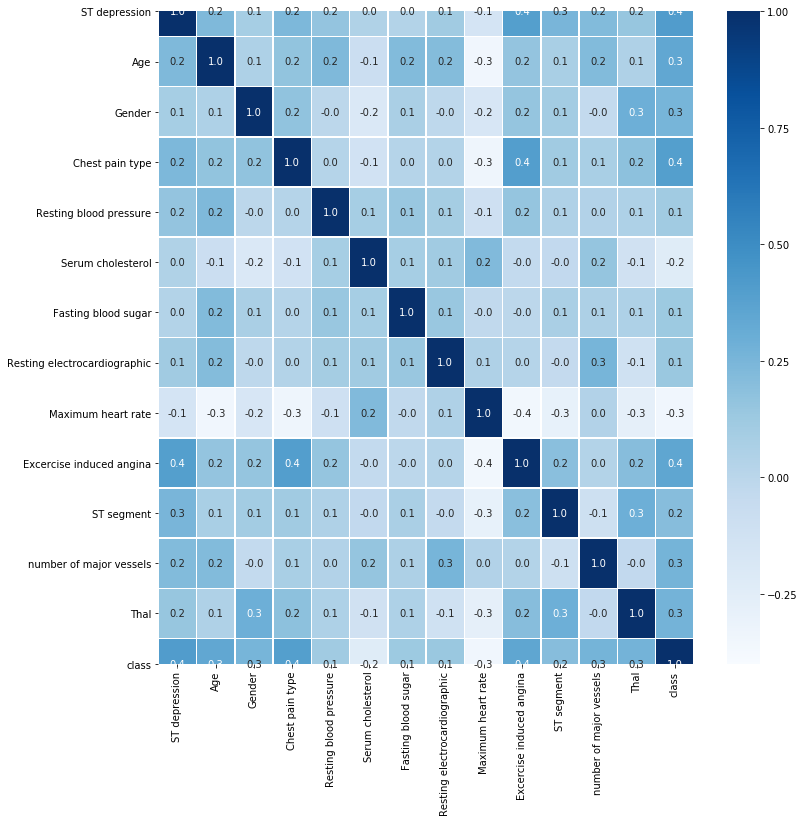

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(data=corrltn, annot=True, linewidths=.5, fmt='.1f', vmin=-0.4, vmax=1, cmap="Blues")

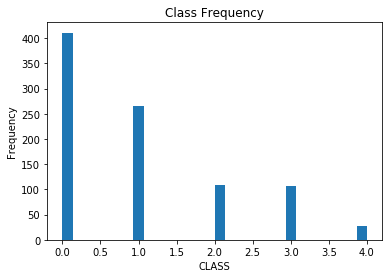

In [14]:
hdClass = new_df['class']
plt.title('Class Frequency')
plt.xlabel('CLASS')
hdClass.plot(kind='hist', range=[0,4], bins=30)

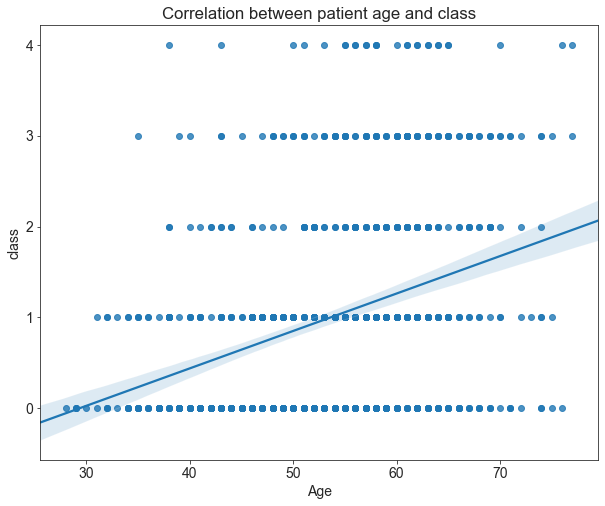

In [25]:
sns.set_style('white')
sns.set_style('ticks')
plt.title('Correlation between patient age and class')
sns.regplot(x='Age', y='class', data=new_df)

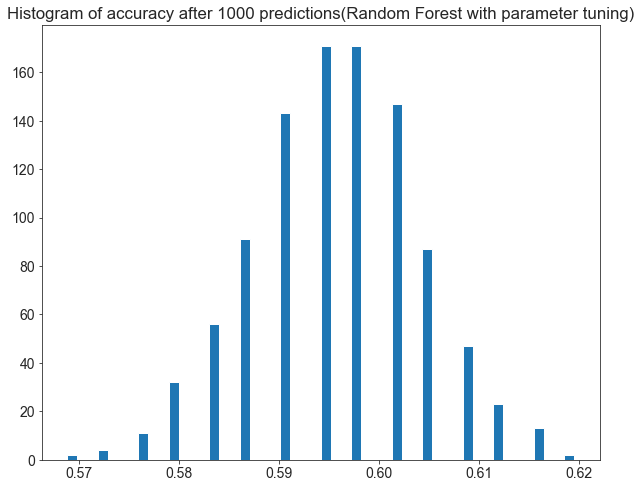

Accuracy [[103  17   3   0   0]
 [ 26  41   8   5   0]
 [  5  13   9   6   0]
 [  2  16   6   8   0]
 [  0   4   0   4   0]]


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')

feature_cols = ['Age','Gender','Chest pain type','Resting blood pressure','Serum cholesterol','Fasting blood sugar',
                'Resting electrocardiographic','Maximum heart rate','Excercise induced angina','ST depression','ST segment',
                'number of major vessels','Thal']
X= new_df[feature_cols]
y= new_df['class']
sets = X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None, stratify=y)

accuracy_list = []
n = 1000

for x in range(n):

    clf = RandomForestClassifier(random_state=None, n_estimators=500)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))

plt.figure()
plt.title('Histogram of accuracy after 1000 predictions(Random Forest with parameter tuning)')
plt.hist(accuracy_list, bins=50)
plt.show()

print("Accuracy", metrics.confusion_matrix(y_test, y_pred))


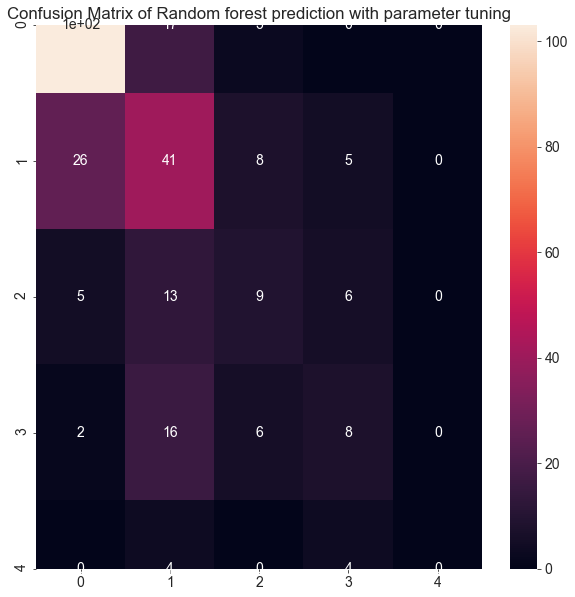

In [122]:
array = [[103,17,3,0,0],
         [26,41,8,5,0],
         [5,13,9,6,0],
         [2,16,6,8,0],
         [0,4,0,4,0]]
df_cm = pd.DataFrame(array, index = [i for i in "01234"],
                     columns = [i for i in "01234"])
plt.figure(figsize = (10,10))
plt.title('Confusion Matrix of Random forest prediction with parameter tuning')
sns.heatmap(df_cm,annot=True)

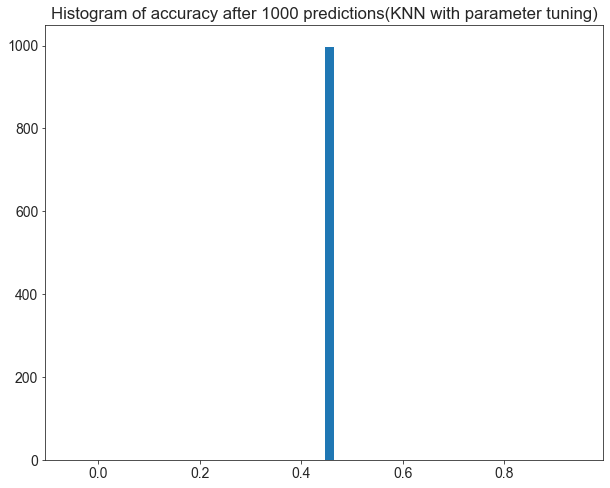

Accuracy [[123   0   0   0   0]
 [ 80   0   0   0   0]
 [ 33   0   0   0   0]
 [ 32   0   0   0   0]
 [  8   0   0   0   0]]


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')

feature_cols = ['Age','Gender','Chest pain type','Resting blood pressure','Serum cholesterol','Fasting blood sugar',
                'Resting electrocardiographic','Maximum heart rate','Excercise induced angina','ST depression','ST segment',
                'number of major vessels','Thal']
X= new_df[feature_cols]
y= new_df['class']
sets = X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None, stratify=y)

accuracy_list = []
n = 1000

for x in range(n):

    clf = KNeighborsClassifier(n_neighbors=500)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))

plt.figure()
plt.title('Histogram of accuracy after 1000 predictions(KNN with parameter tuning)')
plt.hist(accuracy_list, bins=50)
plt.show()

print("Accuracy", metrics.confusion_matrix(y_test, y_pred))

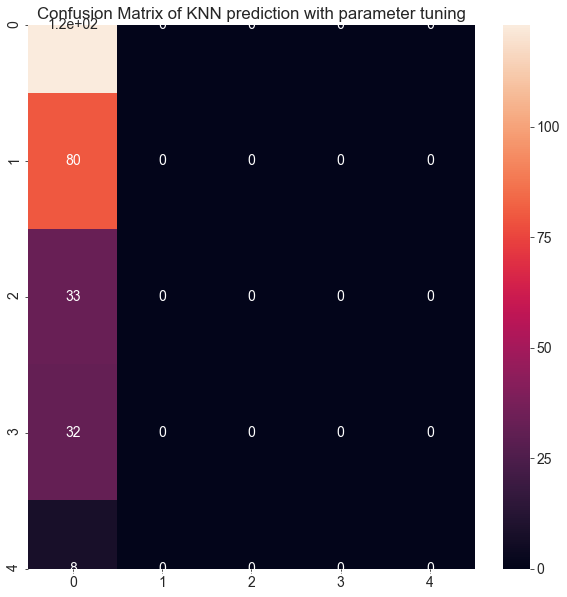

In [124]:
arrayy = [[123,0,0,0,0],
         [80,0,0,0,0],
         [33,0,0,0,0],
         [32,0,0,0,0],
         [8,0,0,0,0]]
df_cmm = pd.DataFrame(arrayy, index = [i for i in "01234"],
                     columns = [i for i in "01234"])
plt.figure(figsize = (10,10))
plt.title('Confusion Matrix of KNN prediction with parameter tuning')
sns.heatmap(df_cmm,annot=True)

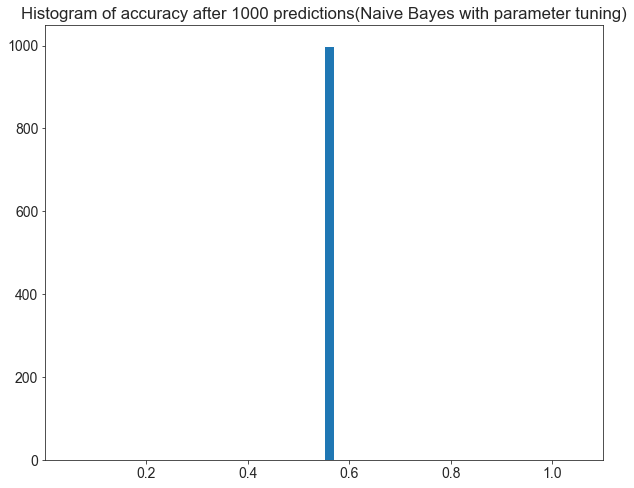

Accuracy [[104  14   1   4   0]
 [ 22  38   8   7   5]
 [  3  15   3   9   3]
 [  4  13   3   7   5]
 [  0   2   1   5   0]]
Accuracy 0.5507246376811594


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')

feature_cols = ['Age','Gender','Chest pain type','Resting blood pressure','Serum cholesterol','Fasting blood sugar',
                'Resting electrocardiographic','Maximum heart rate','Excercise induced angina','ST depression','ST segment',
                'number of major vessels','Thal']
X= new_df[feature_cols]
y= new_df['class']
sets = X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None, stratify=y)

accuracy_list = []
n = 1000

for x in range(n):

    clf = GaussianNB(priors=None)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))

plt.figure()
plt.title('Histogram of accuracy after 1000 predictions(Naive Bayes with parameter tuning)')
plt.hist(accuracy_list, bins=50)
plt.show()

print("Accuracy", metrics.confusion_matrix(y_test, y_pred))
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

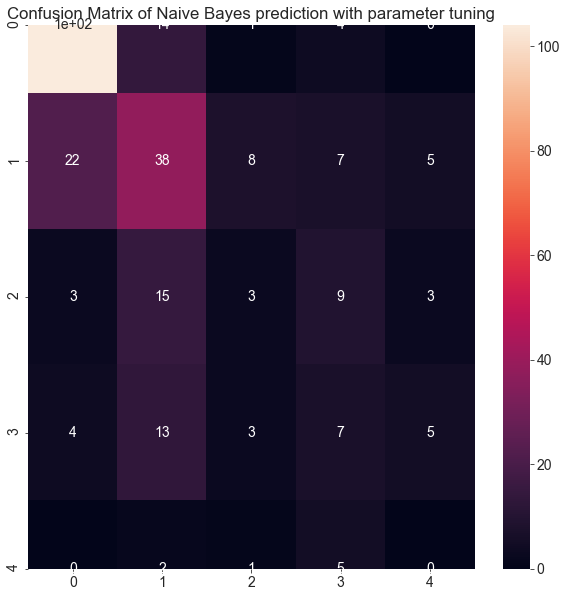

In [127]:
arrayyy = [[104,14,1,4,0],
         [22,38,8,7,5],
         [3,15,3,9,3],
         [4,13,3,7,5],
         [0,2,1,5,0]]
df_cmmm = pd.DataFrame(arrayyy, index = [i for i in "01234"],
                     columns = [i for i in "01234"])
plt.figure(figsize = (10,10))
plt.title('Confusion Matrix of Naive Bayes prediction with parameter tuning')
sns.heatmap(df_cmmm,annot=True)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from MachineLearningg import knn_classifier
from sklearn import metrics

dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3, random_state=1)

model = KnnClassifier.knn_classifier

model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred))
print("\n", metrics.confusion_matrix(y_test, y_pred))
print("\n", metrics.classification_report(y_test, y_pred))

ModuleNotFoundError: No module named 'MachineLearningg'